# 实验2 多项式回归模型应用实验

### 任务1：糖尿病患病线性回归实验
1）在scikit-learn工具包中基于其中的糖尿病数据集diabetes，调用scikit-learn中LinearRegression算法函数进行自主实验（一年后糖尿病数值与患者BMI指数的线性回归）。<br>
2）调用scikit-learn中的MSE/R2指标工具计算上一步实验的相应指标值。<br>
3）调用matplotlib画出测试集数据散点图和预测直线图。<br>
4）写出实验过程，分析实验结果，提交实验报告。

1.导入模块

In [143]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

2.获取数据集

In [144]:
# 获取糖尿病数据集
diabetes = datasets.load_diabetes()  
X, y = diabetes.data, diabetes.target
# 将特征矩阵和目标变量整合成DataFrame
df = pd.DataFrame(data=np.c_[X, y], columns=diabetes.feature_names + ["target"])
# 输出前几行
print("前几行数据集:")
print(df.head())

前几行数据集:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


3.选择BMI指数作为特征向量（x值），糖尿病数值作为y值

In [145]:
x = df['bmi']
y = df['target']

4.划分训练集和测试集（随机分割或手动分割）

In [146]:
# 定义手动分割的比例，如80%用于训练，20%用于测试
split_ratio = 0.8

# 计算手动分割的索引
split_index = int(len(x) * split_ratio)

# 分割特征向量和目标变量为训练集和测试集
x_train = x[:split_index]
x_test = x[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# 输出训练集和测试集的大小
print("训练集大小:", x_train.shape)
print("测试集大小:", x_test.shape)

训练集大小: (353,)
测试集大小: (89,)


In [147]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# 输出训练集和测试集的大小
print("训练集大小:", X_train.shape)
print("测试集大小:", X_test.shape)

训练集大小: (309,)
测试集大小: (133,)


5.建立一元线性回归模型拟合糖尿病数值与BMI指数的关系

In [148]:
# 创建线性回归模型对象
model = LinearRegression()

# 将特征向量 x 转换为二维数组
x_train = X_train.values.reshape(-1, 1)
x_test = X_test.values.reshape(-1, 1)

# 在训练集上拟合线性回归模型
model.fit(x_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(x_test)

# 输出模型的系数和截距
print("模型系数:", model.coef_)
print("模型截距:", model.intercept_)

模型系数: [988.41931249]
模型截距: 151.04202449316014


6.测试集数据预测糖尿病数值

In [149]:
# 使用训练好的模型对测试集进行预测
y_pred = model.predict(x_test)

# 输出预测结果
print("测试集预测结果:", y_pred[:5])

测试集预测结果: [144.90793957 187.52115034 147.03860011 202.4357741  131.05864608]


7.评估一元线性回归模型（MSE和R2）

In [150]:
# 计算均方误差（MSE）
mse = mean_squared_error(y_test, y_pred)
print("均方误差（MSE）:", mse)

# 计算决定系数（R2）
r2 = r2_score(y_test, y_pred)
print("决定系数（R2）:", r2)

均方误差（MSE）: 3884.936720961032
决定系数（R2）: 0.2803417492440603


8.画出测试数据集散点图及拟合直线图

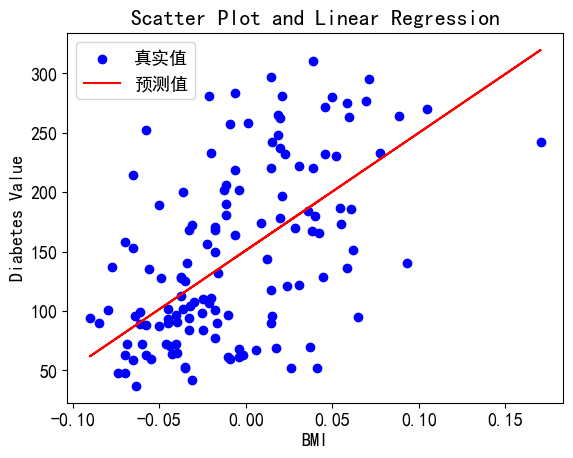

In [151]:
# 绘制散点图
plt.scatter(x_test, y_test, color='blue', label='真实值')

# 绘制拟合直线
plt.plot(x_test, y_pred, color='red', label='预测值')

# 设置图标题和坐标轴标签
plt.title("Scatter Plot and Linear Regression")
plt.xlabel("BMI")
plt.ylabel("Diabetes Value")

# 添加图例
plt.legend()

# 显示图形
plt.show()

### 任务2：梯度下降法求解方程
### 仿照代码4.4，在TensorFlow2框架下利用它们提供的自动求导方法来实现对方程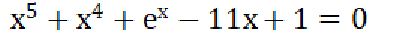的梯度下降法求解。<br>
1.定义损失函数<br>
2.定义梯度函数<br>
3.更新参数求解<br>
（1）设置初始参数值<br>
（2）设置学习率（步长）值<br>
（3）设置迭代次数或迭代条件<br>

In [152]:
import tensorflow as tf

# 定义方程
def f(x):
    return x**5 + x**4 + tf.exp(x) - 11*x + 1

# 定义损失函数
def loss_fun(x, target):
    predicted = f(x)
    loss = tf.square(predicted - target)
    return loss

# 定义梯度下降法函数
def gradient_descent(x, target, learning_rate=0.01, num_iterations=100):
    for _ in range(num_iterations):
        with tf.GradientTape() as tape:
            loss = loss_fun(x, target)
        gradients = tape.gradient(loss, x)
        x.assign_sub(learning_rate * gradients)
    return x

# 初始化输入值
x = tf.Variable(0.0)

# 设置目标值
target = 0.0

# 使用梯度下降法进行求解
result = gradient_descent(x, target)

print("最小值解：", result.numpy())
print("最小值：", f(result).numpy())

最小值解： 0.20239298
最小值： 2.3841858e-05


### 任务3：多项式回归实验
#### 1）通过调用scikit-learn工具包中相关函数，实现对指定样本集的多项式回归拟合。
#### 2）分别用三次多项式回归模型、五次多项式回归模型、九次多项式回归模型来拟合指定的样本集，分别画出拟合的曲线，分别计算出样本集的MSE，并观察它们的多项式系数。
#### 3）写出实验过程，记录拟合的曲线和MSE、系数等数据值，给出初步的分析，提交实验报告。

#### 训练样本由平面上的点组成，x是实例，y是标签。

In [153]:
import numpy as np
x_train0 = np.linspace(0, 6, 7)
x_train0

array([0., 1., 2., 3., 4., 5., 6.])

In [154]:
y_train0 = np.array([0.01625328, 1.34756601, 2.689906  , 1.90670405, 1.68225754,1.50995894, 2.40339366])

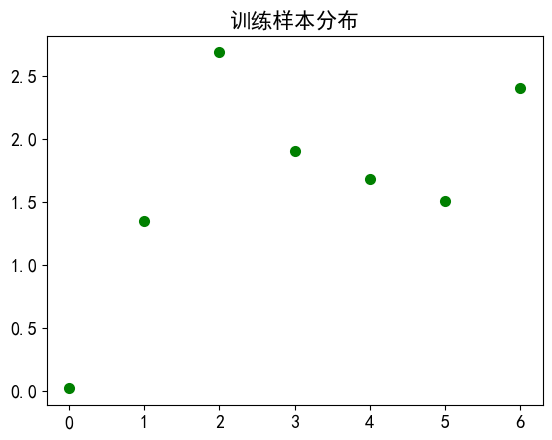

In [155]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', family='SimHei', size=13)
plt.title(u'训练样本分布')
plt.scatter(x_train0, y_train0, color="green", linewidth=2)
plt.show()

拟合线性回归模型

In [156]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error
x_train = x_train0.reshape(-1,1)
y_train = y_train0.reshape(-1,1)
# 创建并拟合模型
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
print('--线性回归模型--')
print('训练集均方误差MSE：',mean_squared_error(y_train, y_pred_train))
print('系数：' + str(model.coef_))
print('截距：' + str(model.intercept_))

# plt.title(u'线性回归模型预测')
# plt.scatter(x_train0, y_train0, color="green", linewidth=2)
# x1 = np.linspace(0, 6, 100)
# x1 = x1.reshape(-1,1)
# y1 = model.predict(x1)
# plt.plot(x1, y1, "r--", linewidth=1)
# plt.show()

--线性回归模型--
训练集均方误差MSE： 0.42816499115346446
系数：[[0.23137709]]
截距：[0.95673151]


### 拟合三次多项式模型
#### 1.将自变量x_train进行特征变换，将其转换为三项式特征，使用PolynomialFeatures类来创建三项式特征
#### 2.拟合三次多项式回归模型,输出模型参数和MSE，使用LinearRegression类来拟合三项式回归模型
#### 3.可视化三次多项式回归的结果，使用matplotlib库来可视化

In [157]:
from sklearn.preprocessing import PolynomialFeatures
def myfun(x):
    '''目标函数
    input:x(float):自变量
    output:函数值'''
    return 10 + 5 * x + 4 * x**2 + 6 * x**3
featurizer_3 = PolynomialFeatures(degree=3)
x_3 = featurizer_3.fit_transform(x_train)
x_p_3 = featurizer_3.transform(y_train)
model_3 = LinearRegression()
model_3.fit(x_3, y_train)
y3 = model_3.predict(featurizer_3.fit_transform(x1))
# print('--三次多项式模型--')
# print('训练集预测值与样本的残差均方值：' + str(np.mean((model_3.predict(x_3)-y_train)**2)))
# print('测试集预测值与目标函数值的残差均方值：' + str(np.mean((model_3.predict(x_p_3)-myfun(y_train))**2)))
# print('系数：' + str(model_3.coef_))
# print('截距：' + str(model_3.intercept_))


### 拟合五次多项式模型

In [158]:
from sklearn.preprocessing import PolynomialFeatures
def myfun(x):
    '''目标函数
    input:x(float):自变量
    output:函数值'''
    return 10 + 5 * x + 4 * x**2 + 6 * x**3 + 5* x**4 + 3*x**5
featurizer_5 = PolynomialFeatures(degree=5)
x_5 = featurizer_5.fit_transform(x_train)
x_p_5 = featurizer_5.transform(y_train)
model_5 = LinearRegression()
model_5.fit(x_5, y_train)
print('--五次多项式模型--')
print('训练集预测值与样本的残差均方值：' + str(np.mean((model_5.predict(x_5)-y_train)**2)))
print('测试集预测值与目标函数值的残差均方值：' + str(np.mean((model_5.predict(x_p_5)-myfun(y_train))**2)))
print('系数：' + str(model_5.coef_))
print('截距：' + str(model_5.intercept_))

# plt.title(u'五次多项式模型')
# plt.scatter(x_train, y_train, color="green", linewidth=2)
# plt.plot(x1, y1, color="red", linewidth=1)
# y5 = model_5.predict(featurizer_5.fit_transform(x1))
# plt.plot(x1, y5, "b--", linewidth=1)
# plt.show()


--五次多项式模型--
训练集预测值与样本的残差均方值：0.025026500346739592
测试集预测值与目标函数值的残差均方值：155286.43740424115
系数：[[ 0.          0.47591328  1.87462054 -1.1269987   0.21791579 -0.01375281]]
截距：[0.00248394]


### 九次多项式模型

--九次多项式模型--
训练集预测值与样本的残差均方值：3.430824444210893e-23
测试集预测值与目标函数值的残差均方值：1612346556.8668592
系数：[[ 0.          2.64465775 -0.9110165   0.08978878]]
截距：[-0.09658877]


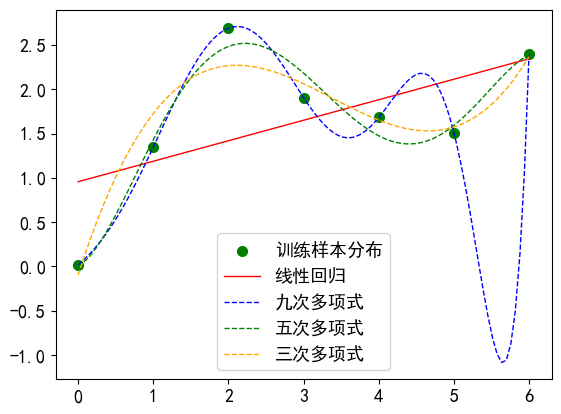

In [159]:
from sklearn.preprocessing import PolynomialFeatures
def myfun(x):
    '''目标函数
    input:x(float):自变量
    output:函数值'''
    return 10 + 5 * x + 4 * x**2 + 6 * x**3 + 5* x**4 + 6*x**5 + 6*x**6+7*x**7+8*x**8+9*x**9
featurizer_9 = PolynomialFeatures(degree=9)
x_9 = featurizer_9.fit_transform(x_train)
x_p_9 = featurizer_9.transform(y_train)
model_9 = LinearRegression()
model_9.fit(x_9, y_train)
y9 = model_9.predict(featurizer_9.fit_transform(x1))
print('--九次多项式模型--')
print('训练集预测值与样本的残差均方值：' + str(np.mean((model_9.predict(x_9)-y_train)**2)))
print('测试集预测值与目标函数值的残差均方值：' + str(np.mean((model_3.predict(x_p_3)-myfun(y_train))**2)))
print('系数：' + str(model_3.coef_))
print('截距：' + str(model_3.intercept_))
plt.rcParams['axes.unicode_minus']=False
plt.scatter(x_train, y_train, color="green", linewidth=2, label="训练样本分布")
plt.plot(x1, y1, color="red", linewidth=1, label="线性回归")
plt.plot(x1, y9, linestyle="--", linewidth=1, color="blue", label="九次多项式")
plt.plot(x1, y5, linestyle="--", linewidth=1, color="green", label="五次多项式")
plt.plot(x1, y3, linestyle="--", linewidth=1, color="orange", label="三次多项式")
plt.legend(labels=["训练样本分布", "线性回归", "九次多项式","五次多项式", "三次多项式"])

plt.show()
